# Telemarketing example

## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('telemarketing_train.csv')


In [2]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,admin.,single,university.degree,no,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0


In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
14995,51,admin.,married,basic.6y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
14996,53,housemaid,married,basic.4y,unknown,no,no,cellular,jul,tue,...,20,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
14997,41,management,married,unknown,no,yes,no,cellular,may,fri,...,5,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
14998,34,admin.,single,university.degree,no,yes,no,cellular,aug,fri,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
14999,51,admin.,single,university.degree,no,no,no,cellular,jun,fri,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,1


## Split categorical/continuos variables

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
target              int64
dtype: object

In [6]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,success
1,admin.,single,university.degree,no,yes,no,cellular,jun,mon,nonexistent
2,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,nonexistent
3,management,single,university.degree,no,no,no,telephone,may,tue,nonexistent
4,technician,single,university.degree,no,yes,yes,cellular,nov,fri,nonexistent


In [7]:
df_numerical=df.select_dtypes(include=['int64','float64'])
df_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0
3,32,237,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,32,1162,2,999,0,-0.1,93.200,-42.0,4.021,5195.8,0


In [8]:
df_numerical.columns


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'target'],
      dtype='object')

In [9]:
df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target']]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0
3,32,237,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,32,1162,2,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...
14995,51,253,1,999,0,1.1,93.994,-36.4,4.856,5191.0,0
14996,53,165,20,999,0,1.4,93.918,-42.7,4.961,5228.1,0
14997,41,163,5,999,1,-1.8,92.893,-46.2,1.250,5099.1,0
14998,34,82,3,999,0,1.4,93.444,-36.1,4.964,5228.1,0


## Categorical data

In [10]:
df_categorical.shape

(15000, 10)

In [11]:
df.marital

0        married
1         single
2        married
3         single
4         single
          ...   
14995    married
14996    married
14997    married
14998     single
14999     single
Name: marital, Length: 15000, dtype: object

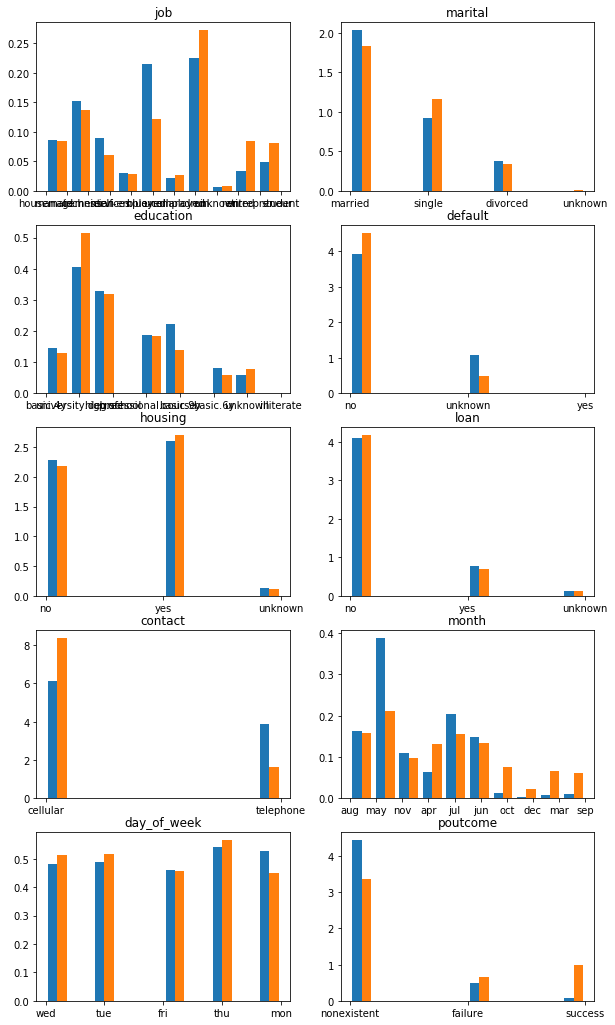

In [12]:
df_0=df_categorical[df['target']==0] # records wih target==0
df_1=df_categorical[df['target']==1] # records wih target==1


fig, axes = plt.subplots(5, 2,figsize=[10,18])
axes = axes.flatten()
i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()


In [13]:
df_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [14]:
dummies = pd.get_dummies(df_categorical[['marital', 'education','housing', 'loan', 'contact',
       'month', 'poutcome']],drop_first=True) 

#dummies = pd.get_dummies(df_categorical[['job', 'education',  'contact', 'month', 'poutcome']],drop_first=True) 

dummies.tail()

,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
14995,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
14996,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
14997,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
14998,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14999,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


## Numerical data

In [15]:
df_numerical.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,40.064800,297.008067,2.478000,939.488333,0.217133,-0.096573,93.548268,-40.431340,3.416243,5157.248747,0.229867
std,11.029333,299.894155,2.587166,235.702994,0.572953,1.642955,0.597707,4.854176,1.811398,78.591234,0.420761
min,17.000000,10.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,112.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.299000,5099.100000,0.000000
50%,38.000000,199.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,47.000000,372.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36d76da690>,
      dtype=object)

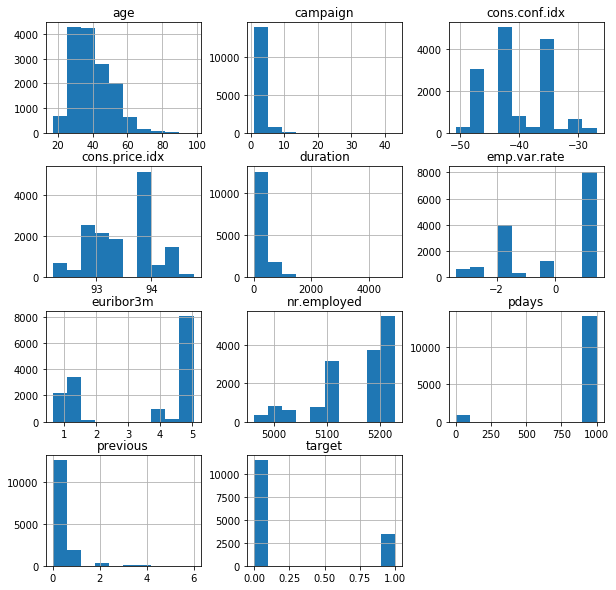

In [16]:
df_numerical.hist(figsize=(10,10))

In [17]:
import math
pd.options.mode.chained_assignment = None

df_numerical['logcampaign']=df_numerical['campaign'].apply(lambda x: math.log(x+1))
df_numerical['logduration']=df_numerical['duration'].apply(lambda x: math.log(x+1))
df_numerical['logprevious']=df_numerical['previous'].apply(lambda x: math.log(x+1))


In [18]:
df_numerical.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,logcampaign,logduration,logprevious
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1,0.693147,4.304065,0.693147
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1,0.693147,5.793014,0.000000
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0,1.791759,5.241747,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36d6bb3a90>,
      dtype=object)

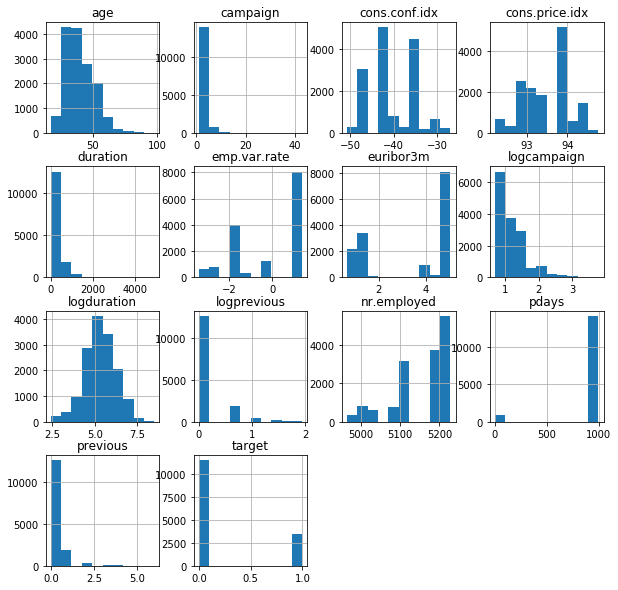

In [19]:
df_numerical.hist(figsize=(10,10))

In [20]:
df_numerical=df_numerical.drop(columns=['campaign','duration','previous'])

## Univariate/Bivariate distributions

In [21]:
df_numerical.columns

Index(['age', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'target', 'logcampaign', 'logduration',
       'logprevious'],
      dtype='object')

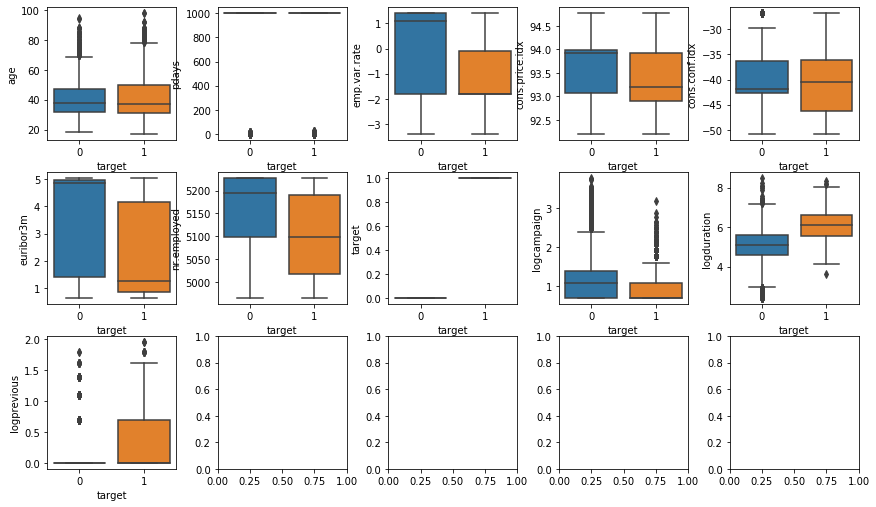

In [22]:
%matplotlib inline

fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(12,7))
fig.tight_layout()

for i, col in enumerate(df_numerical.columns):
    sns.boxplot(y = col, x = "target",data=df_numerical, orient='v', ax=axes[int(i/5),i%5])

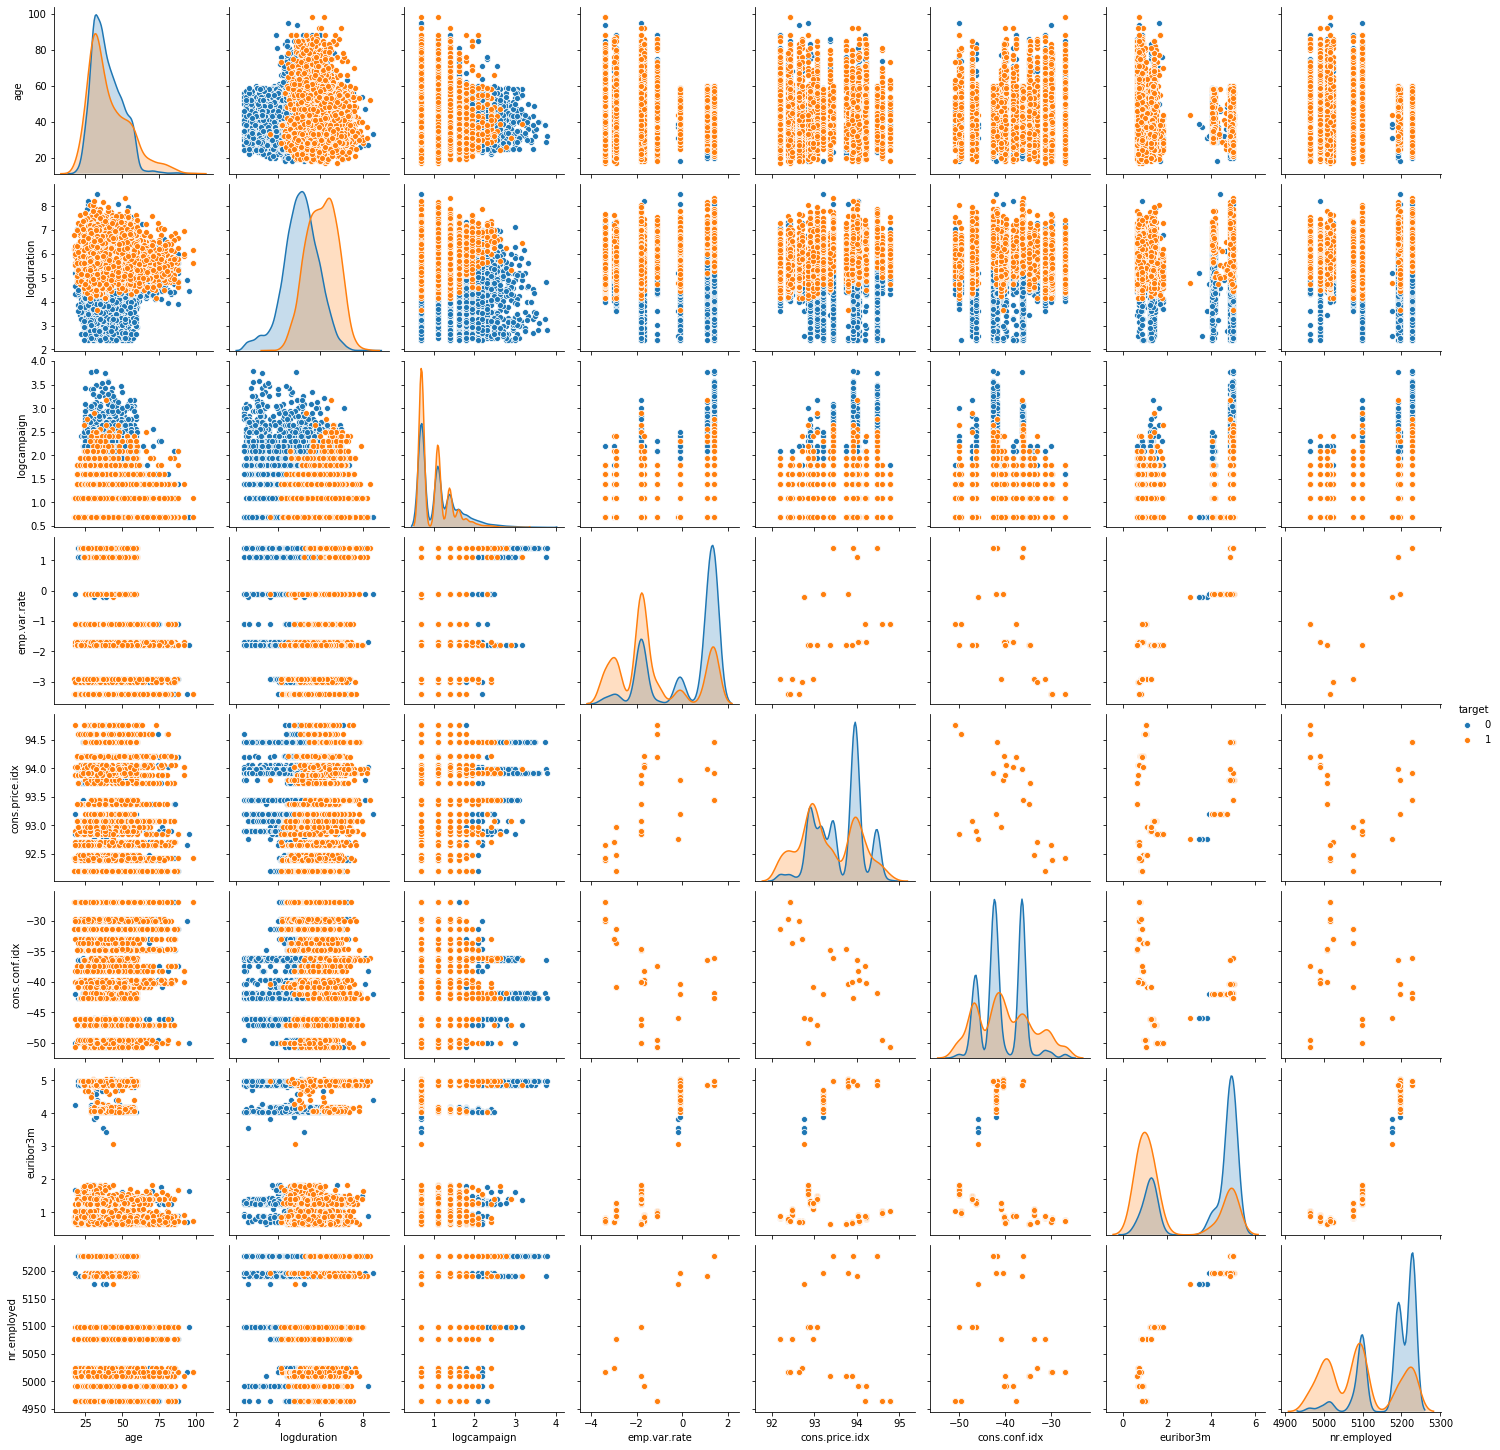

In [23]:
sns.pairplot(df_numerical[['age','logduration','logcampaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','target']], hue='target')

## Univariate test (BE CAREFULL)

In [24]:
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest

X=df_numerical[['age', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'logcampaign', 'logduration',
       'logprevious']]

y=df_numerical.target


In [25]:
selector_chi=SelectKBest(feature_selection.chi2, k=8)
selector_f=SelectKBest(feature_selection.f_classif, k=6)

#Test
#classification: chi2, f_classif, mutual_info_classif
#regression: f_regression, mutual_info_regression

from sklearn.preprocessing import MinMaxScaler

mm_scaler =  MinMaxScaler(copy=False,feature_range=(0, 1))
XX=mm_scaler.fit_transform(X)


X_chi = pd.DataFrame(selector_chi.fit_transform(XX, y),columns=X.columns[selector_chi.get_support()])
X_f = pd.DataFrame(selector_f.fit_transform(XX, y),columns=X.columns[selector_f.get_support()])

In [26]:
print(X.columns[selector_chi.get_support()])
print(X.columns[selector_f.get_support()])


Index(['pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed',
       'logcampaign', 'logduration', 'logprevious'],
      dtype='object')
Index(['pdays', 'emp.var.rate', 'euribor3m', 'nr.employed', 'logduration',
       'logprevious'],
      dtype='object')


## Standarize

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,logcampaign,logduration,logprevious
0,1.444850,-3.969061,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,1.830396,-0.854550,-1.097469,1.773840
1,1.082169,0.252494,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,1.830396,-0.854550,0.536136,-0.417764
2,0.447476,0.252494,0.910934,-0.174453,0.892321,0.854483,0.901546,-0.546330,1.439148,-0.068688,-0.417764
3,-0.731238,0.252494,0.728330,0.745760,0.830517,0.795410,0.429467,-0.546330,-0.008014,0.184232,-0.417764
4,-0.731238,0.252494,-0.002086,-0.582693,-0.323168,0.333873,0.490545,-0.546330,-0.008014,1.924853,-0.417764


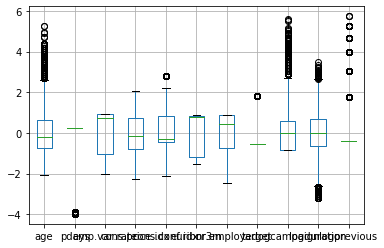

In [28]:
scaled_df.boxplot()

In [29]:
scaled_df.tail()

,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,logcampaign,logduration,logprevious
14995,0.991498,0.252494,0.728330,0.745760,0.830517,0.794858,0.429467,-0.546330,-0.854550,0.255617,-0.417764
14996,1.172839,0.252494,0.910934,0.618604,-0.467378,0.852827,0.901546,-0.546330,4.054683,-0.211054,-0.417764
14997,0.084795,0.252494,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913,-0.546330,1.439148,-0.224353,1.773840
14998,-0.549897,0.252494,0.910934,-0.174453,0.892321,0.854483,0.901546,-0.546330,0.592612,-0.971543,-0.417764
14999,0.991498,0.252494,-1.706389,-0.979221,-0.075950,-1.185998,-1.031304,1.830396,-0.008014,-0.251445,-0.417764


In [30]:
#X_numerical=scaled_df[['age','logduration','logprevious','logcampaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
X_numerical=scaled_df[['age','logduration','logcampaign','logprevious','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [31]:
dummies.tail(3)

,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
14997,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
14998,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14999,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [32]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(15000, 26)
(15000, 9)


,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
14995,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
14996,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
14997,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
14998,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14999,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [33]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,...,poutcome_success,age,logduration,logcampaign,logprevious,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
14995,1,0,0,1,0,0,0,0,0,0,...,0,0.991498,0.255617,-0.854550,-0.417764,0.728330,0.745760,0.830517,0.794858,0.429467
14996,1,0,0,0,0,0,0,0,0,0,...,0,1.172839,-0.211054,4.054683,-0.417764,0.910934,0.618604,-0.467378,0.852827,0.901546
14997,1,0,0,0,0,0,0,0,0,1,...,0,0.084795,-0.224353,1.439148,1.773840,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913
14998,0,1,0,0,0,0,0,0,1,0,...,0,-0.549897,-0.971543,0.592612,-0.417764,0.910934,-0.174453,0.892321,0.854483,0.901546
14999,0,1,0,0,0,0,0,0,1,0,...,0,0.991498,-0.251445,-0.008014,-0.417764,-1.706389,-0.979221,-0.075950,-1.185998,-1.031304


### Separate Train/Test sets


In [34]:
y=df['target']

In [35]:
y.shape

(15000,)

In [36]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(10500, 35) (4500, 35)


## Models

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [38]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,1000,100)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("Best f1: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))



In [39]:
hyperp_search(classifier,parameters)

Best f1: 0.627565 using {'n_neighbors': 10}
f1      train 0.700   test 0.627
precision  train 0.793   test 0.719

[[3242  224]
 [ 460  574]]


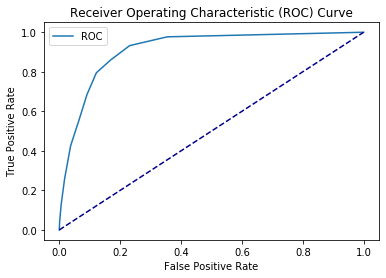

AUC: 0.91


In [40]:
model_knn = KNeighborsClassifier(n_neighbors=10)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [41]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)


Best f1: 0.735926 using {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1      train 0.736   test 0.718
precision  train 0.766   test 0.762

[[3246  220]
 [ 331  703]]


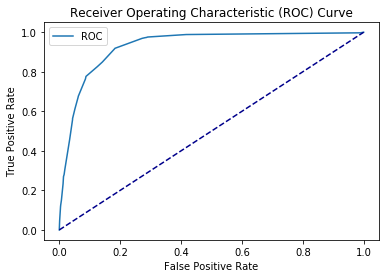

AUC: 0.93


In [42]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


## Plotting the tree 

In [43]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=3)
print(r)


|--- nr.employed <= -0.89
|   |--- logduration <= -0.25
|   |   |--- poutcome_success <= 0.50
|   |   |   |--- nr.employed <= -2.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- nr.employed >  -2.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- poutcome_success >  0.50
|   |   |   |--- logcampaign <= 0.29
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logcampaign >  0.29
|   |   |   |   |--- class: 0
|   |--- logduration >  -0.25
|   |   |--- poutcome_success <= 0.50
|   |   |   |--- logduration <= 0.21
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logduration >  0.21
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- poutcome_success >  0.50
|   |   |   |--- euribor3m <= -1.40
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- euribor3m >  -1.40
|   |   |   |   |--- truncated branch of depth 2
|--- nr.employed >  -0.89
|   |--- logduration <= 0.94
|   |   |--- cons.conf.idx <= -1.28
| 

In [44]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.5253764640267707
f1_test:  0.5253764640267707
[[3178  288]
 [ 563  471]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3466
           1       0.62      0.46      0.53      1034

    accuracy                           0.81      4500
   macro avg       0.74      0.69      0.70      4500
weighted avg       0.80      0.81      0.80      4500



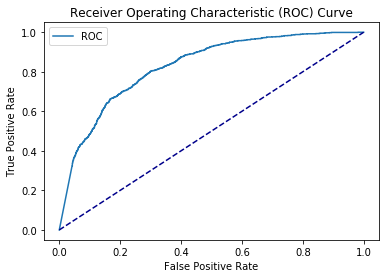

AUC: 0.83


In [45]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)


In [46]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)


Best f1: 0.715075 using {'C': 10, 'max_iter': 1000}
f1      train 0.719   test 0.689
precision  train 0.767   test 0.733

[[3222  244]
 [ 363  671]]


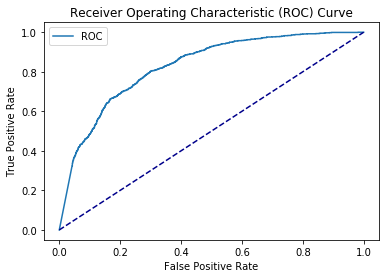

AUC: 0.83


In [47]:
model_logistic = LogisticRegression(C=10, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)


In [48]:
model_logistic.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

Best f1: 0.723030 using {'C': 100, 'kernel': 'linear'}
f1      train 0.727   test 0.709
precision  train 0.758   test 0.737

[[3215  251]
 [ 329  705]]


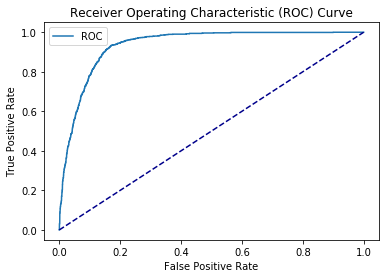

AUC: 0.93


In [50]:
model = SVC(C=100, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


In [51]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

Best f1: 0.740365 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
f1      train 0.767   test 0.722
precision  train 0.776   test 0.728

[[3189  277]
 [ 294  740]]


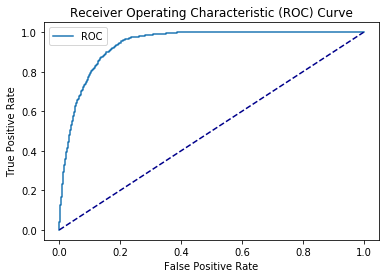

AUC: 0.94


In [52]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)


In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

parameters = {'n_estimators' : [2,5,7,10],
              'criterion': ['entropy','gini'], 
              'max_depth': [2,5,7,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]
             }

hyperp_search(classifier,parameters)


Best f1: 0.721832 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 7}
f1      train 0.739   test 0.687
precision  train 0.798   test 0.750

[[3247  219]
 [ 378  656]]


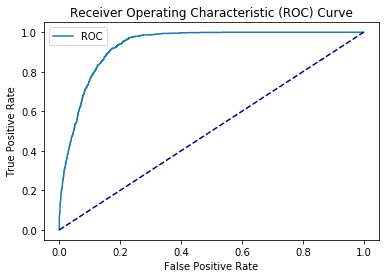

AUC: 0.93


In [54]:
model_forest=RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=10)

fpr7,tpr7=roc(model_forest,X_train,y_train,X_test,y_test)

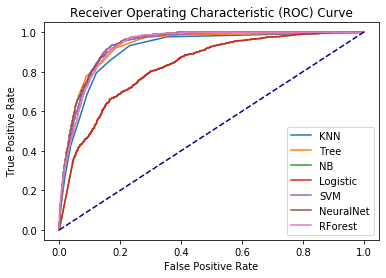

In [55]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot(fpr7, tpr7, label= "RForest")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Making predictions

In [56]:
df2 = pd.read_csv('telemarketing_pred_withtarget.csv')

In [57]:
#pd.options.mode.chained_assignment = None  # default='warn'

df2_categorical=df2.select_dtypes(include=['object'])

# Categorical

dummies2 = pd.get_dummies(df2_categorical[['marital', 'education','housing', 'loan', 'contact',
       'month', 'poutcome']],drop_first=True) 
    
# Numerical
df2_numerical=df2.select_dtypes(include=['int','float'])
df2_numerical['logcampaign']=df2_numerical['campaign'].apply(lambda x: math.log(x+1))
df2_numerical['logduration']=df2_numerical['duration'].apply(lambda x: math.log(x+1))
df2_numerical['logprevious']=df2_numerical['previous'].apply(lambda x: math.log(x+1))

df2_numerical=df2_numerical.drop(columns=['campaign','duration','previous'])



In [58]:
# Scaling - WE MUST USE THE SAME SCALING OF THE TRAIN!
scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

# Feature selection
X2_numerical=scaled_df2[['age','logduration','logcampaign','logprevious','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
X2=pd.concat([dummies2,X2_numerical], axis = 1)


In [59]:
y2_pred = model_tree.predict(X2)
y2=df2.target
print("f1_test: ", f1_score(y2, y2_pred))
print(confusion_matrix(y2, y2_pred))
print(classification_report(y2, y2_pred))

f1_test:  0.7214734950584007
[[3577  231]
 [ 389  803]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3808
           1       0.78      0.67      0.72      1192

    accuracy                           0.88      5000
   macro avg       0.84      0.81      0.82      5000
weighted avg       0.87      0.88      0.87      5000



In [60]:
# Retrain the model (with the entire dataset)

model_tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)
model_tree3.fit(X, y)

y_tree = model_tree3.predict(X2)

print("f1_test: ", f1_score(y2, y_tree))
print(confusion_matrix(y2, y_tree))
print(classification_report(y2, y_tree))

f1_test:  0.7622641509433962
[[3524  284]
 [ 283  909]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3808
           1       0.76      0.76      0.76      1192

    accuracy                           0.89      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.89      0.89      0.89      5000



In [61]:
from sklearn.neural_network import MLPClassifier

model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)
model_MLP.fit(X, y)

y_MLP = model_MLP.predict(X2)

print("f1_test: ", f1_score(y2,y_MLP))
print(confusion_matrix(y2,y_MLP))
print(classification_report(y2,y_MLP))


f1_test:  0.7665418227215979
[[3518  290]
 [ 271  921]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3808
           1       0.76      0.77      0.77      1192

    accuracy                           0.89      5000
   macro avg       0.84      0.85      0.85      5000
weighted avg       0.89      0.89      0.89      5000



In [62]:
predictions=pd.DataFrame()

predictions['tree']=y_tree
predictions['MLP']=y_MLP

predictions

,tree,MLP
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4995,0,0
4996,0,0
4997,0,0
4998,0,0


In [63]:
predictions.to_csv('telemarketing_predictions.csv')

## Model Interpretation 

### Logistic Regression

Feature: marital_married, Score: -0.02147
Feature: marital_single, Score: 0.08672
Feature: marital_unknown, Score: 0.39042
Feature: education_basic.6y, Score: -0.03790
Feature: education_basic.9y, Score: -0.08737
Feature: education_high.school, Score: 0.07836
Feature: education_illiterate, Score: -0.54352
Feature: education_professional.course, Score: 0.19507
Feature: education_university.degree, Score: 0.29268
Feature: education_unknown, Score: 0.14378
Feature: housing_unknown, Score: -0.04560
Feature: housing_yes, Score: 0.04279
Feature: loan_unknown, Score: -0.04560
Feature: loan_yes, Score: -0.12695
Feature: contact_telephone, Score: -0.52695
Feature: month_aug, Score: 1.27025
Feature: month_dec, Score: 0.10982
Feature: month_jul, Score: -0.07999
Feature: month_jun, Score: -1.07309
Feature: month_mar, Score: 2.49382
Feature: month_may, Score: -0.75686
Feature: month_nov, Score: -0.94151
Feature: month_oct, Score: 0.10231
Feature: month_sep, Score: -0.17513
Feature: poutcome_nonexis

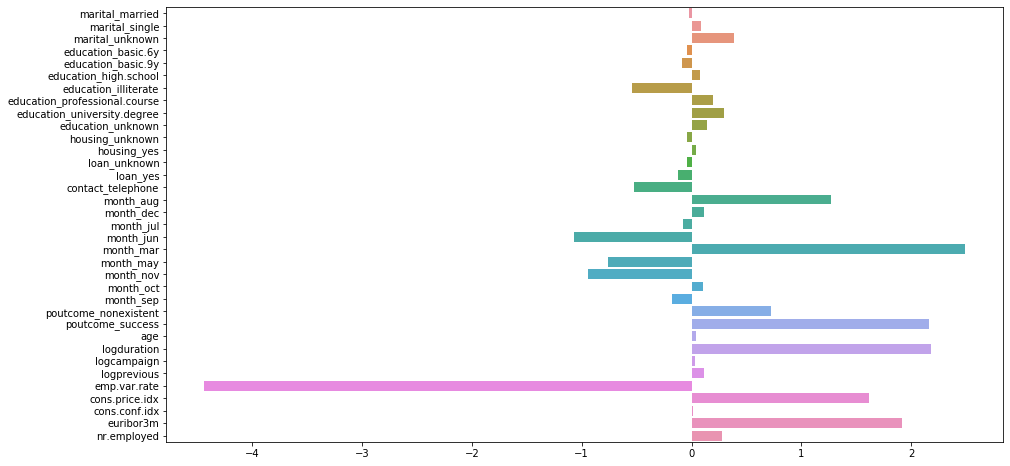

In [64]:
log_importance = model_logistic.coef_[0,:]
# summarize feature importance
for i,v in zip(X.columns,log_importance): #enumerate(tree_importance):
    print('Feature: %s, Score: %.5f' % (i,v))

# plot feature importance

plt.figure(figsize=(15,8))
ax = sns.barplot(x=log_importance, y=X.columns)


### Tree/Forest

Feature: marital_married, Score: 0.00358
Feature: marital_single, Score: 0.00358
Feature: marital_unknown, Score: 0.00000
Feature: education_basic.6y, Score: 0.00114
Feature: education_basic.9y, Score: 0.00215
Feature: education_high.school, Score: 0.00207
Feature: education_illiterate, Score: 0.00000
Feature: education_professional.course, Score: 0.00260
Feature: education_university.degree, Score: 0.00519
Feature: education_unknown, Score: 0.00146
Feature: housing_unknown, Score: 0.00017
Feature: housing_yes, Score: 0.00303
Feature: loan_unknown, Score: 0.00045
Feature: loan_yes, Score: 0.00168
Feature: contact_telephone, Score: 0.01775
Feature: month_aug, Score: 0.00188
Feature: month_dec, Score: 0.00029
Feature: month_jul, Score: 0.00127
Feature: month_jun, Score: 0.00182
Feature: month_mar, Score: 0.00270
Feature: month_may, Score: 0.02168
Feature: month_nov, Score: 0.00123
Feature: month_oct, Score: 0.00674
Feature: month_sep, Score: 0.00269
Feature: poutcome_nonexistent, Score: 

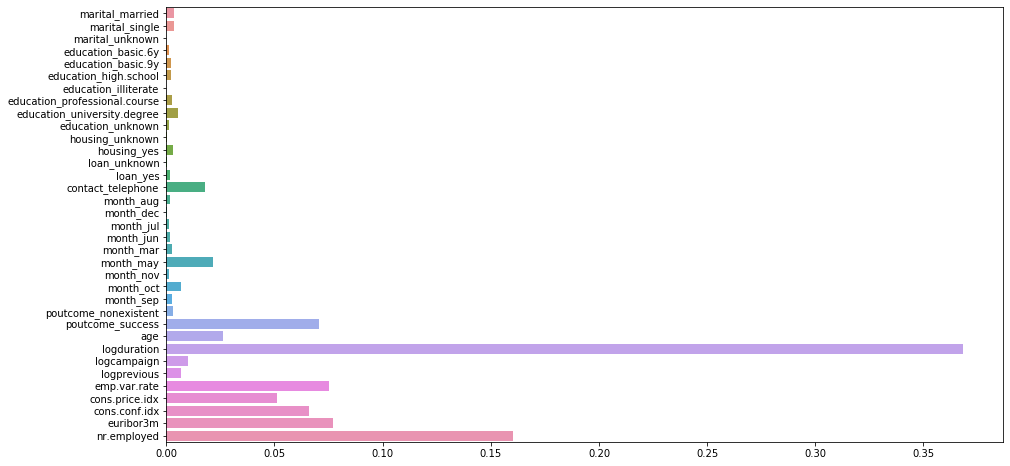

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns

# get importance
tree_importance = model_forest.feature_importances_
# summarize feature importance
for i,v in zip(X.columns,tree_importance): #enumerate(tree_importance):
    print('Feature: %s, Score: %.5f' % (i,v))

# plot feature importance

plt.figure(figsize=(15,8))
ax = sns.barplot(x=tree_importance, y=X.columns)
